<a href="https://colab.research.google.com/github/RAHULGUPTA41298/BIKE-SHARING-DEMAND-CAPSTON2/blob/main/22_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
#for ounting of notebook to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing all important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
import datetime as dt

In [3]:
#loading of Dataset 
path='/content/drive/MyDrive/BIKE SHARING DEMAND PREDICTION-2/SeoulBikeData.csv'

In [4]:
 # I switched this simply by defining a different codec package in the read_csv() command:
df=pd.read_csv(path, encoding= 'unicode_escape')

**DATA PREPERATION AND CLEANING**

In [5]:
# head() function for checking data overview from the top
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
#tail comand for checking last rows data overview from the bottom
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [6]:
# viewing no of rows and columns of the dataset using shape command
print(df.shape)

(8760, 14)


In [7]:
# printing all the columns present here
print('features of the dataset or all columns')
df.columns

features of the dataset or all columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
#checking details of the dataset it contains all the info and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
#unique value of our dataset, this is possible through group by command also
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
#to get insight of the dataset lets use description command(.T used to change row and columns)(here rented bike count is our dependent variable)
df.describe().T


count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

This data set contains 8760 lines and 14 columns.
In a day we have 365 days a year and 24 hour,if we mulityply all we wll get
8760 which is our datase bold text


In [ ]:
# Checking missing values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Date columns to Date format conversion > by using head ommand we are able to  check whether it hanged or not

df['Date']= pd.to_datetime(df['Date'])

In [ ]:
# extracting day,month, day of week and weekdays/weekend from date column

df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

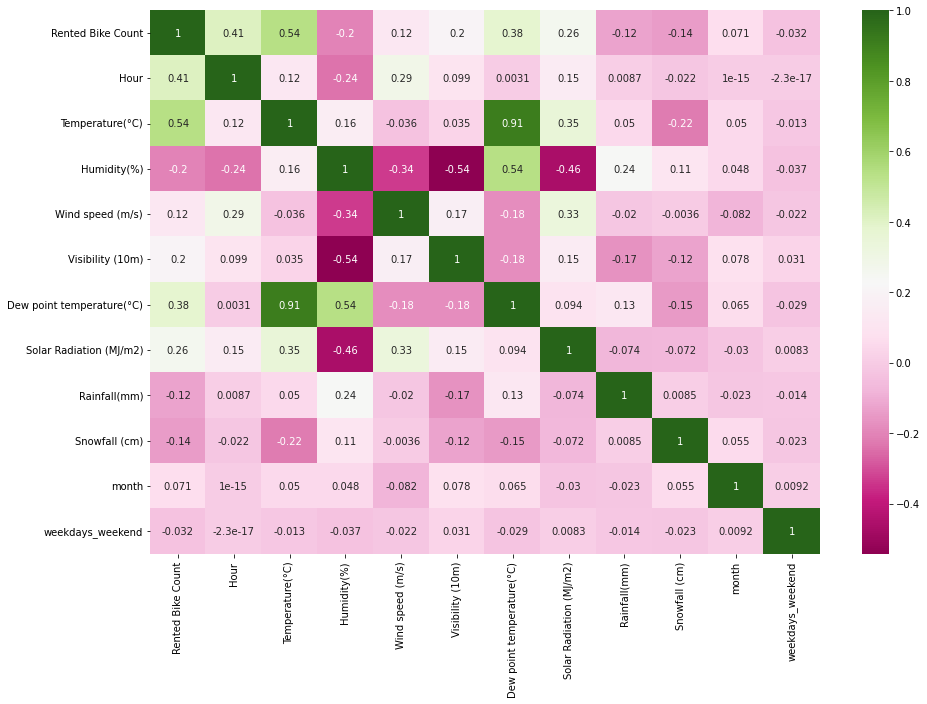

In [ ]:
#checking correlation using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)

In [ ]:
df.corr()

Rented Bike Count          Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  4.102573e-01         0.538558   
Hour                                0.410257  1.000000e+00         0.124114   
Temperature(°C)                     0.538558  1.241145e-01         1.000000   
Humidity(%)                        -0.199780 -2.416438e-01         0.159371   
Wind speed (m/s)                    0.121108  2.851967e-01        -0.036252   
Visibility (10m)                    0.199280  9.875348e-02         0.034794   
Dew point temperature(°C)           0.379788  3.054372e-03         0.912798   
Solar Radiation (MJ/m2)             0.261837  1.451309e-01         0.353505   
Rainfall(mm)                       -0.123074  8.714642e-03         0.050282   
Snowfall (cm)                      -0.141804 -2.151645e-02        -0.218405   
month                               0.070861  1.036729e-15         0.049683   
weekdays_weekend                   -0.032259 -2.300554e-17        -0.012972   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.199780          0.121108          0.199280   
Hour                         -0.241644          0.285197          0.098753   
Temperature(°C)               0.159371         -0.036252          0.034794   
Humidity(%)                   1.000000         -0.336683         -0.543090   
Wind speed (m/s)             -0.336683          1.000000          0.171507   
Visibility (10m)             -0.543090          0.171507          1.000000   
Dew point temperature(°C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)      -0.461919          0.332274          0.149738   
Rainfall(mm)                  0.236397         -0.019674         -0.167629   
Snowfall (cm)                 0.108183         -0.003554         -0.121695   
month                         0.047798         -0.082069          0.077888   
weekdays_weekend             -0.036750         -0.022391          0.030650   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Hour                                        0.003054                 0.145131   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   
month                                       0.065101                -0.030412   
weekdays_weekend                           -0.028966                 0.008271   

                           Rainfall(mm)  Snowfall (cm)         month  \
Rented Bike Count             -0.123074      -0.141804  7.086107e-02   
Hour                           0.008715      -0.021516  1.036729e-15   
Temperature(°C)                0.050282      -0.218405  4.968327e-02   
Humidity(%)                    0.236397       0.108183  4.779778e-02   
Wind speed (m/s)              -0.019674      -0.003554 -8.206909e-02   
Visibility (10m)              -0.167629      -0.121695  7.788783e-02   
Dew point temperature(°C)      0.125597      -0.150887  6.510073e-02   
Solar Radiation (MJ/m2)       -0.074290      -0.072301 -3.041240e-02   
Rainfall(mm)                   1.000000       0.008500 -2.279368e-02   
Snowfall (cm)                  0.008500       1.000000  5.475846e-02   
month                         -0.022794       0.054758  1.000000e+00   
weekdays_weekend              -0.014280      -0.022557  9.174254e-

In [ ]:
# to check  Multicollinearity, how much one feature is correlated with other feature,wich is carried out by VIF, for 1 to 5>multicoolaniarity is ok, 5 to 10 its average
#Here i used x.shape[1] so tat we an find VIF print out number of column wise. 

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# printing out all description of vif.
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

variables       VIF
0                     Hour  3.961874
1          Temperature(°C)  3.236809
2              Humidity(%)  6.114153
3         Wind speed (m/s)  4.616621
4         Visibility (10m)  5.404128
5  Solar Radiation (MJ/m2)  2.272068
6             Rainfall(mm)  1.081252
7            Snowfall (cm)  1.125304
8                    month  4.580307
9         weekdays_weekend  1.399708

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


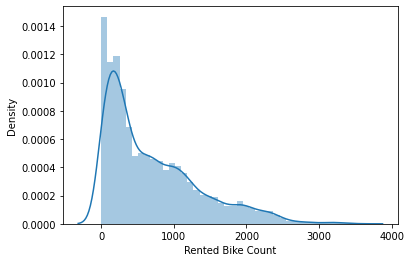

In [ ]:
#lets do some visualising distribution 

sns.distplot(df['Rented Bike Count'])

its showing neative skewed so to change that we can normalise using some transformation, either square root or log or if any possible

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


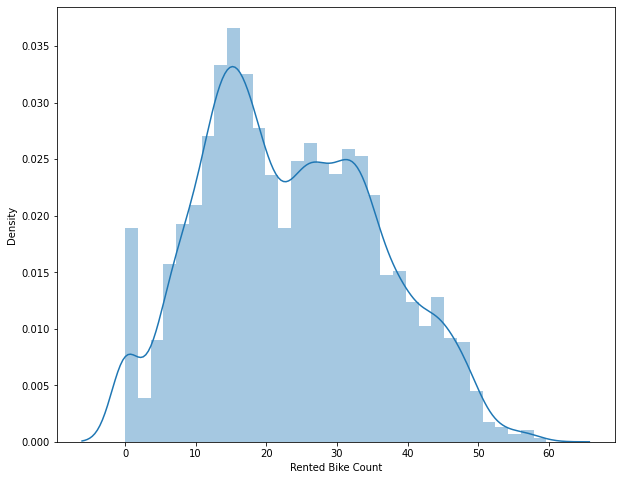

In [ ]:
# square_root transformation

plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['Rented Bike Count']))

know its normalised 

In [ ]:
# lets work with  Numeric Features (exclude object is used to exclude catagorial value )
numeric_features= df.select_dtypes(exclude='object')
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  weekdays_weekend           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


If in any case any null value will be there then we can either exlude that column or row, or we use mean, median , mode to fill that row . according to situation

In [ ]:
# describing numeric feature> here we are able to use T or .transpose()
numeric_features.describe().transpose()

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   
month                      8760.0     6.526027    3.448048   1.0    4.00   
weekdays_weekend           8760.0     0.290411    0.453978   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80  
month                         7.00    10.00    12.00  
weekdays_weekend              0.00     1.00     1.00

Desribe command is usefull when we are scaling our data.

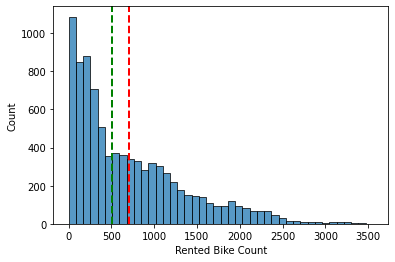

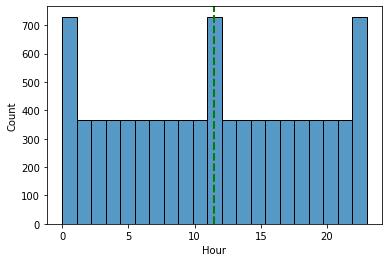

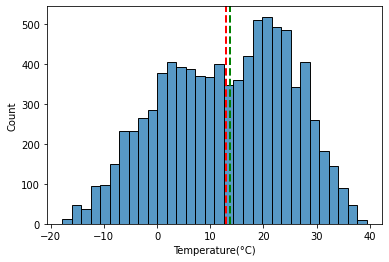

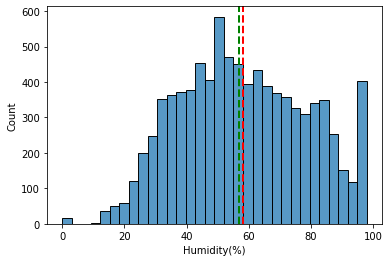

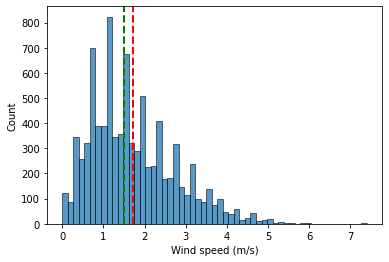

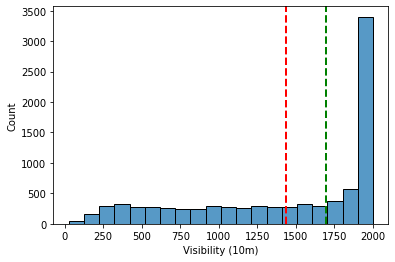

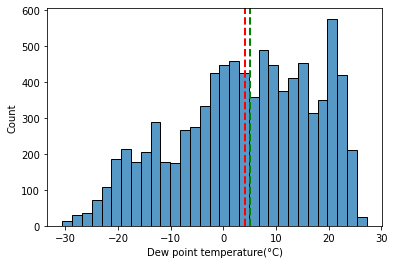

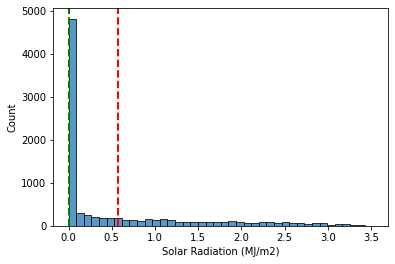

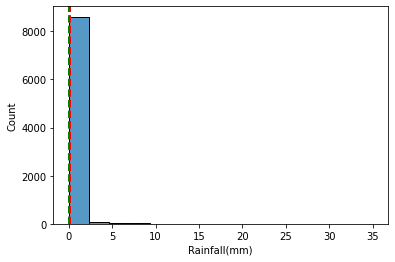

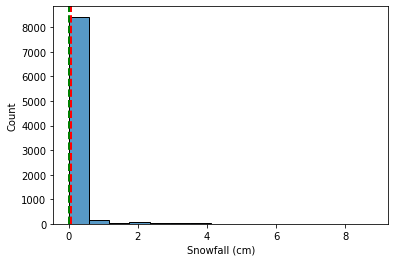

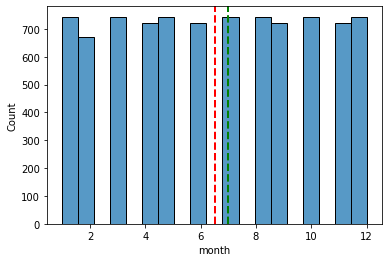

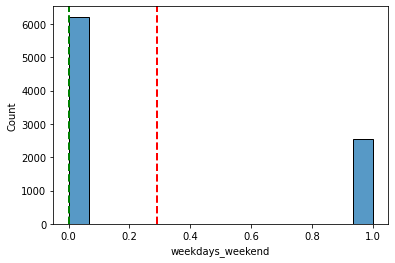

In [ ]:
#plotting histogram of all features with cont  

for col in numeric_features[:]:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2)   
  plt.show()

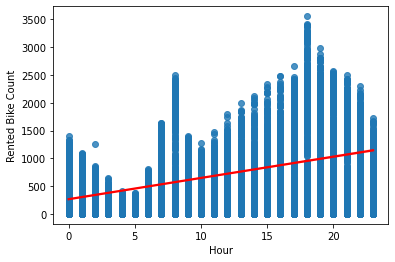

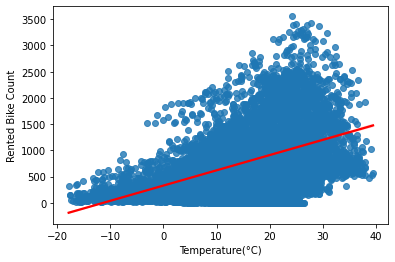

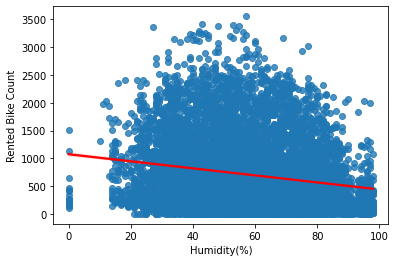

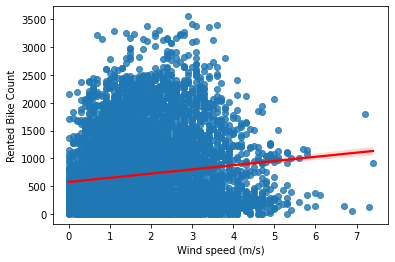

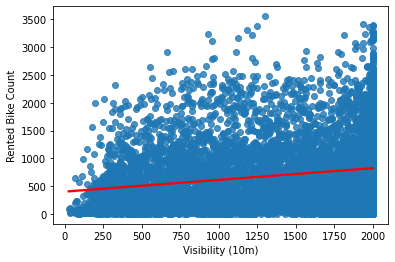

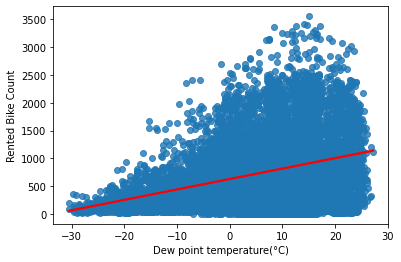

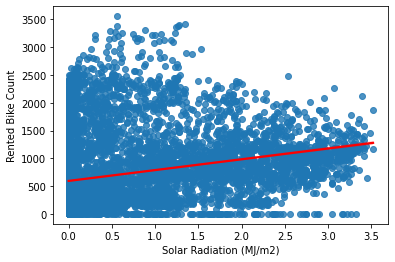

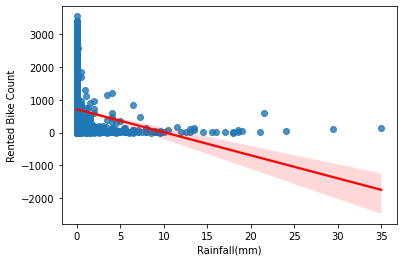

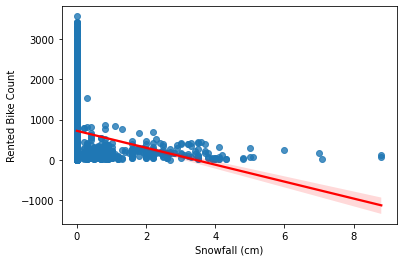

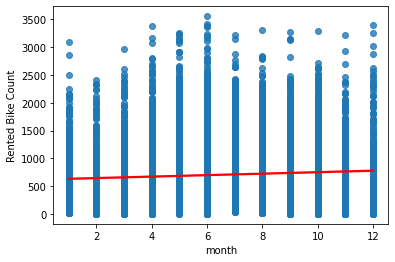

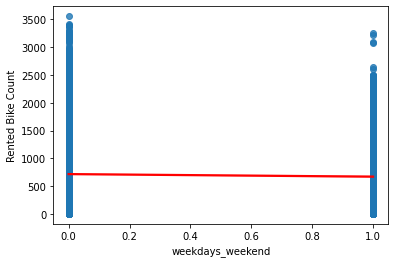

In [ ]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns

for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

In [ ]:
#Extracting categorical features of the dataset
categorical_features= df.select_dtypes(include='object')
categorical_features

Seasons     Holiday Functioning Day
0     Winter  No Holiday             Yes
1     Winter  No Holiday             Yes
2     Winter  No Holiday             Yes
3     Winter  No Holiday             Yes
4     Winter  No Holiday             Yes
...      ...         ...             ...
8755  Autumn  No Holiday             Yes
8756  Autumn  No Holiday             Yes
8757  Autumn  No Holiday             Yes
8758  Autumn  No Holiday             Yes
8759  Autumn  No Holiday             Yes

[8760 rows x 3 columns]

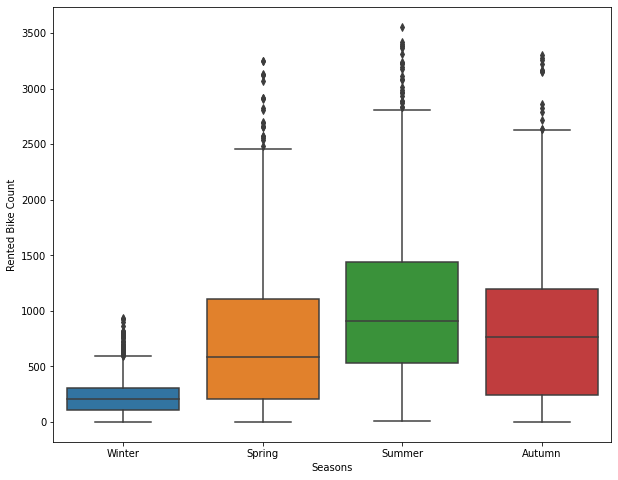

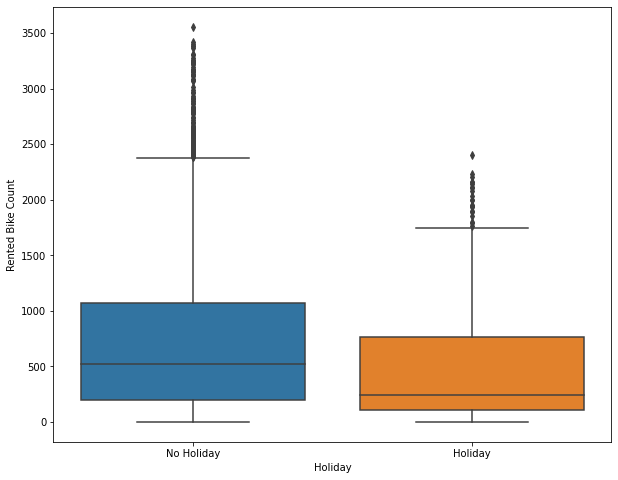

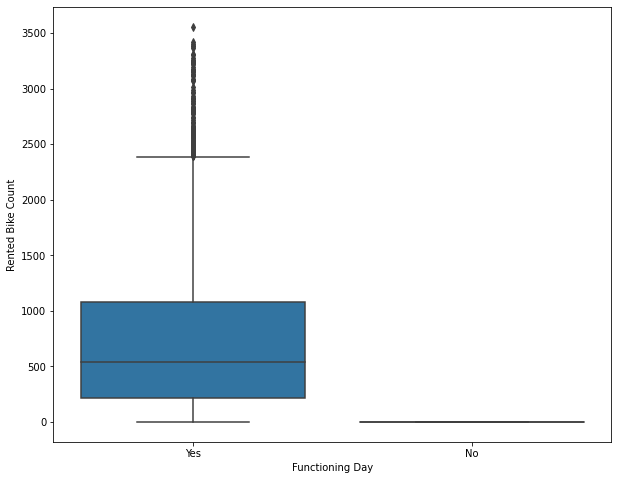

In [ ]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

Conclusion

Less demand on winter seasons

Sligthly Higher demand during Non holidays

Almost no demnad on non functioning day

In [ ]:
#checking counts of functioning day
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

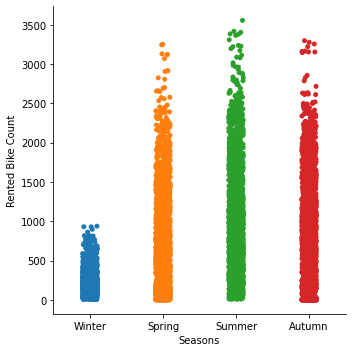

In [ ]:
#ploting cat plot for more info
sns.catplot(x='Seasons',y='Rented Bike Count',data=df)

We are able to see clearly how season affects all, and winter season is less demand season

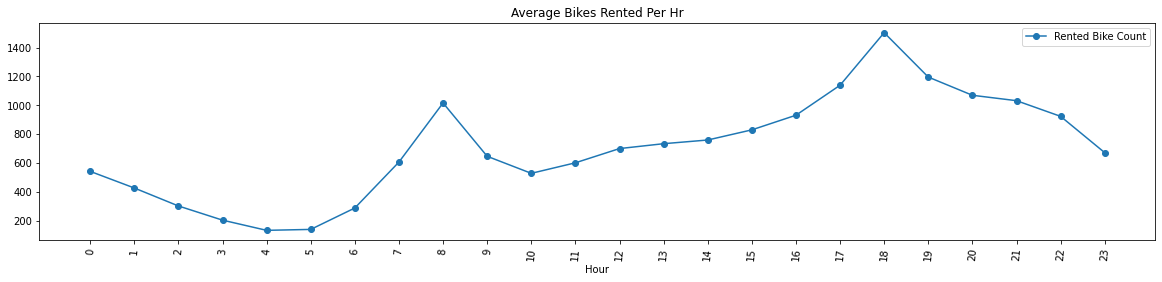

In [ ]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

Conclusion

High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.
we can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand

In [ ]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)
dummy_categorical_feature

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8755                    1  
8756                    1  
8757                    1  
8758                    1  
8759                    1  

[8760 rows x 5 columns]

In [ ]:
#concating numeric columns and dummy columns and creating final df
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [ ]:
#showing head of final df
final_df.head()

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0               0               0               1                   1   
1               0               0               1                   1   
2               0               0               1                   1   
3               0               0               1                   1   
4               0               0               1                   1   

   Functioning Day_Yes  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0                    1                254     0             -5.2           37   
1                    1                204     1             -5.5           38   
2                    1                173     2             -6.0           39   
3                    1                107     3             -6.2           40   
4                    1                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  month  \
0                      0.0           0.0            0.0      1   
1                      0.0           0.0            0.0      1   
2                      0.0           0.0            0.0      1   
3                      0.0           0.0            0.0      1   
4                      0.0           0.0            0.0      1   

   weekdays_weekend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [ ]:
#describing final DF
final_df.describe().transpose()

count         mean         std   min     25%  \
Seasons_Spring             8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Summer             8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Winter             8760.0     0.246575    0.431042   0.0    0.00   
Holiday_No Holiday         8760.0     0.950685    0.216537   0.0    1.00   
Functioning Day_Yes        8760.0     0.966324    0.180404   0.0    1.00   
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   
month                      8760.0     6.526027    3.448048   1.0    4.00   
weekdays_weekend           8760.0     0.290411    0.453978   0.0    0.00   

                               50%      75%      max  
Seasons_Spring                0.00     1.00     1.00  
Seasons_Summer                0.00     1.00     1.00  
Seasons_Winter                0.00     0.00     1.00  
Holiday_No Holiday            1.00     1.00     1.00  
Functioning Day_Yes           1.00     1.00     1.00  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80  
month                         7.00    10.00    12.00  
weekdays_weekend              0.00     1.00     1.00

<Figure size 2000x1600 with 0 Axes>

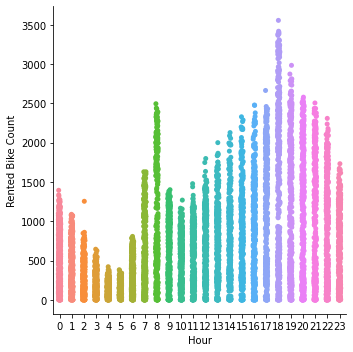

<Figure size 2000x1600 with 0 Axes>

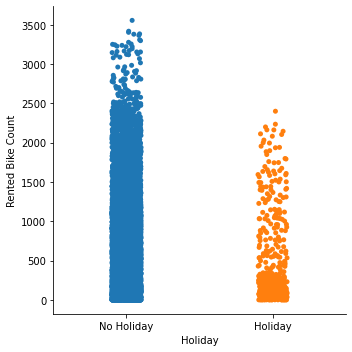

<Figure size 2000x1600 with 0 Axes>

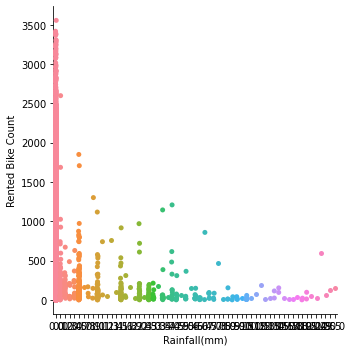

<Figure size 2000x1600 with 0 Axes>

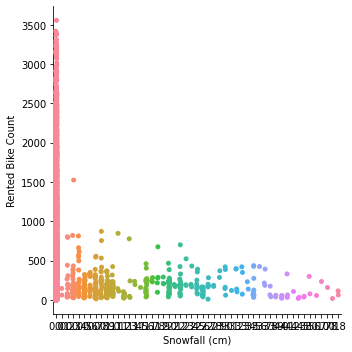

<Figure size 2000x1600 with 0 Axes>

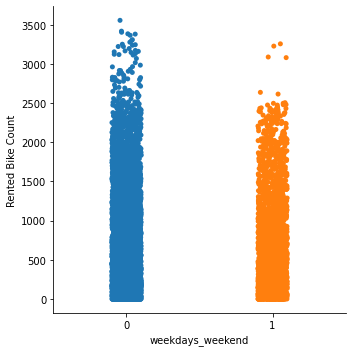

In [ ]:
# ploting cat plot on some feature to get more information

feature_list=["Hour","Holiday",'Rainfall(mm)','Snowfall (cm)','weekdays_weekend']
for feature in feature_list:
  plt.figure(figsize=(10,8),dpi=200)
  sns.catplot(x=feature,y='Rented Bike Count',data=df)
  plt.show()

Conclusion:

From hour v/s rented bike

we can clearly see there is high demand of Rented bike between the office hours.

From working-nonworking v/s rented bike

As cleared from 2nd plot working days has comparatively high demand of rented bike as compared to non working day

From Rainfall v/s rented bike

we can see that if Rainfall increase demand of Rented Bike Decreases

From Snowfall v/s rented bike

we can see that if Snowfall increase demand of Rented Bike Decreases

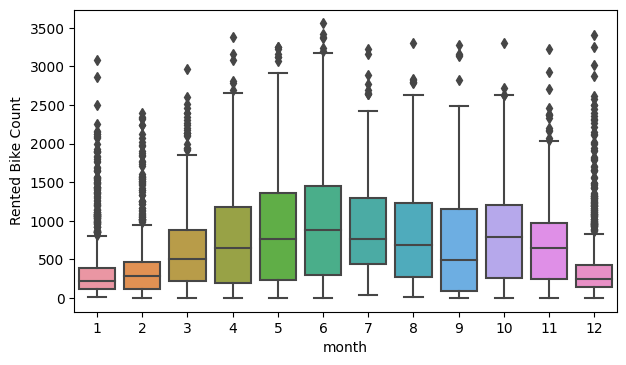

In [ ]:
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='month',y='Rented Bike Count',data=df)
plt.show()

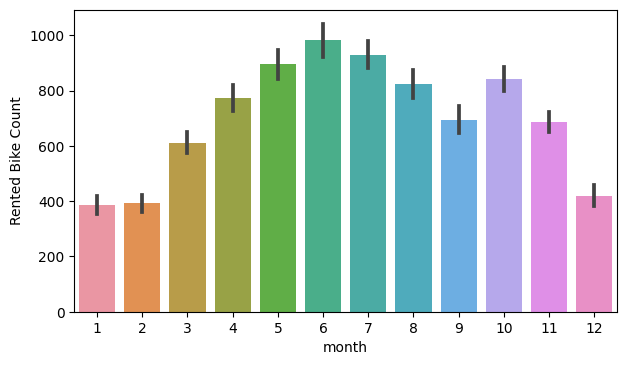

In [ ]:
plt.figure(figsize=(7,4),dpi=100)
sns.barplot(x='month',y='Rented Bike Count',data=df)
plt.show()

**Conclusion:

we can see that there less demand of Rented bike in the month of December, january,February i.e during winter seasons

Also demand of bike is maximum during May,june,july i.e Summer seasons**

#Functions

#Creating Function to train linear models and calculate scores

In [ ]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [ ]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

#creating function to run diffirent models

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

#creating function to get feature importance

In [ ]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

#lime tablular

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 8.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=0da7ca9db99e34a2f0a2b69c60719d92336255021e199cddec0aa73c5e0dbd96
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
# LIME SECTION

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  
  # vaariable to store feature names
  # X=df.drop(dependent_var,axis=1)
  # feature_names =list(X.columns)
  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)

#Train | Test Split for LR

In [ ]:
# Train - Spliting  data
X=final_df.drop(['Rented Bike Count'],axis=1)

In [ ]:
X.shape

(8760, 16)

In [ ]:
y=np.sqrt(final_df['Rented Bike Count'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
X_train[0:10]

In [ ]:
X_test

In [ ]:
#scaling data   min max scalar for scaling value to 0 and 1, standard scalar is for all value etween min max range
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
X_train

In [ ]:
X_test

#Linear Regresseion

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#linear regression model

linear_model= LinearRegression()


================Evalution Matrix=========================

MSE : 175590.55287332062
RMSE : 419.035264474627
R2 : 0.5729108337712393
Adjusted R2 :  0.5697661367350404

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



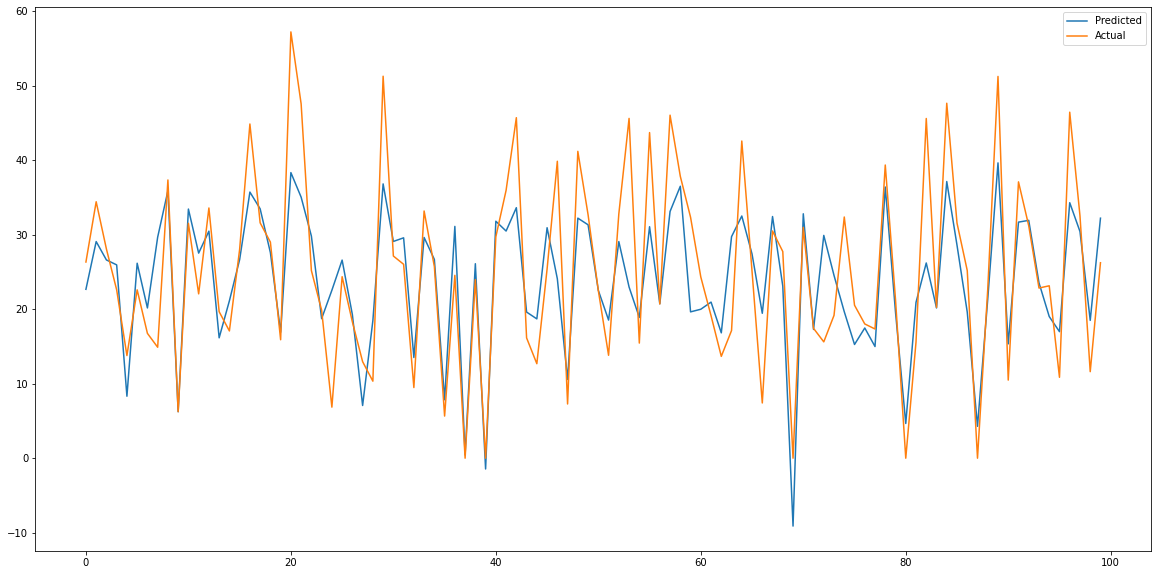

In [ ]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

In [ ]:

linear_model.intercept_

23.3893626063294

In [ ]:
linear_model.coef_

array([-1.13055517, -1.29724672, -3.40834853,  0.61852851,  5.03749648,
        3.41968699, -0.09631816, -6.06121741,  0.05843068, -0.05652447,
        6.82995289, -0.55465867, -1.62151558,  0.10985212,  0.3169146 ,
       -0.29551227])

#Regularisation

#Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.411e+05, tolerance: 8.227e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.422e+05, tolerance: 8.120e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa


================Evalution Matrix=========================

MSE : 175560.90711843758
RMSE : 418.9998891627987
R2 : 0.5729829411854939
Adjusted R2 :  0.569838775082856

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



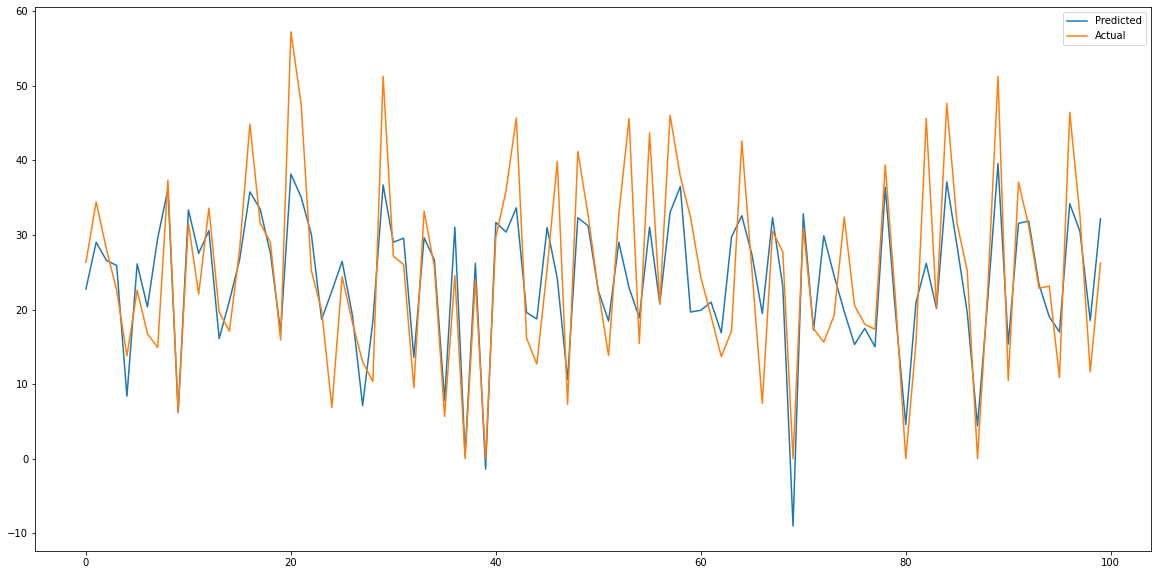

In [ ]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

#Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evalution Matrix=========================

MSE : 175248.93506569506
RMSE : 418.6274418450074
R2 : 0.5737417512792726
Adjusted R2 :  0.5706031723655443

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



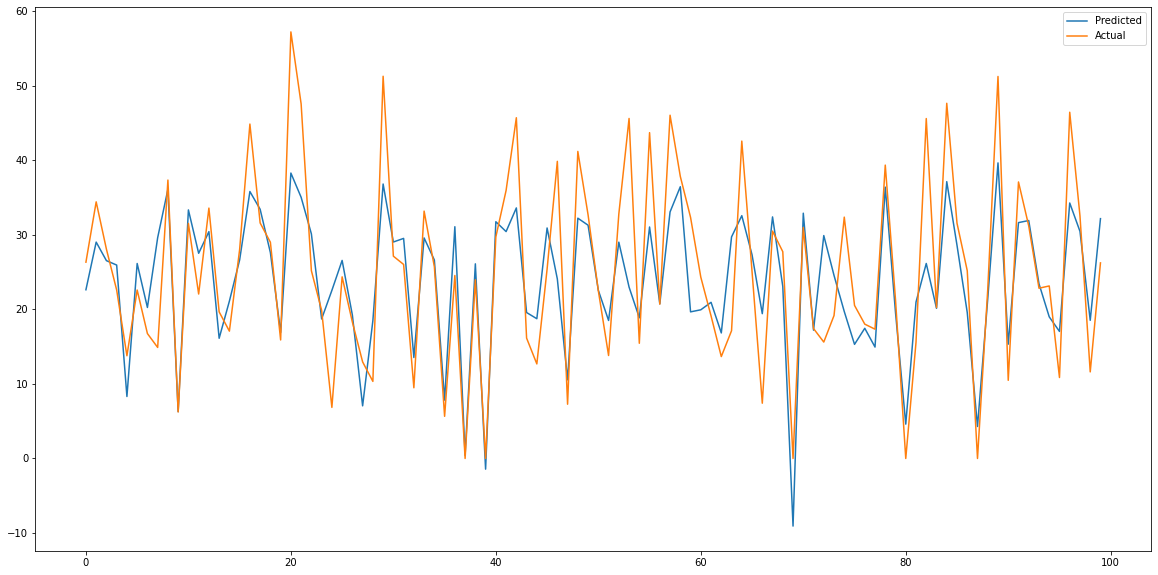

In [ ]:
# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

#ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.411e+05, tolerance: 8.227e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.422e+05, tolerance: 8.120e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa


================Evalution Matrix=========================

MSE : 175346.86749857932
RMSE : 418.74439399062925
R2 : 0.5735035500752621
Adjusted R2 :  0.5703632172640354

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



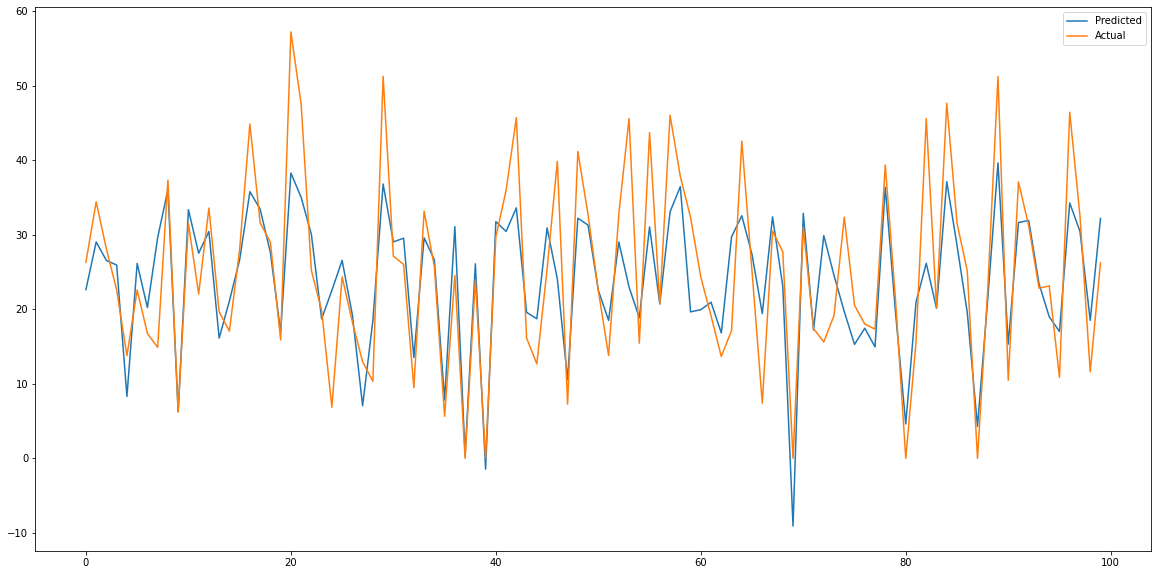

In [ ]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

#Polynomial Regression

In [ ]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

MSE : 123952.86032808443
RMSE : 352.0693970342842
R2 : 0.6985092711258545
Adjusted R2 :  0.6962893670016086

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



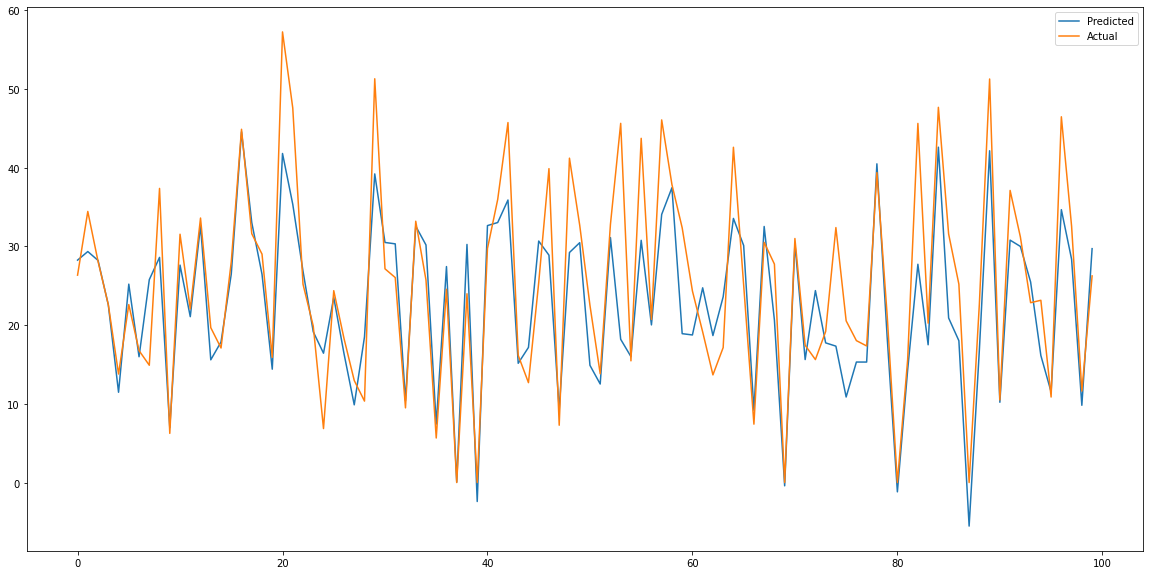

In [ ]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

#KNN and Tree Based Method

#Train | Test split Data For Tree based methods

In [ ]:
#creatin X for independent variable
X=final_df.drop(['Rented Bike Count'],axis=1)

In [ ]:
#creating y for dependent variable
y=final_df['Rented Bike Count']

In [ ]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#creating model
scaler = MinMaxScaler()

In [ ]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


================Evalution Matrix=========================

MSE : 83411.75920852358
RMSE : 288.81094025075225
R2 : 0.7961594359879383
Adjusted R2 :  0.7946585390600998

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



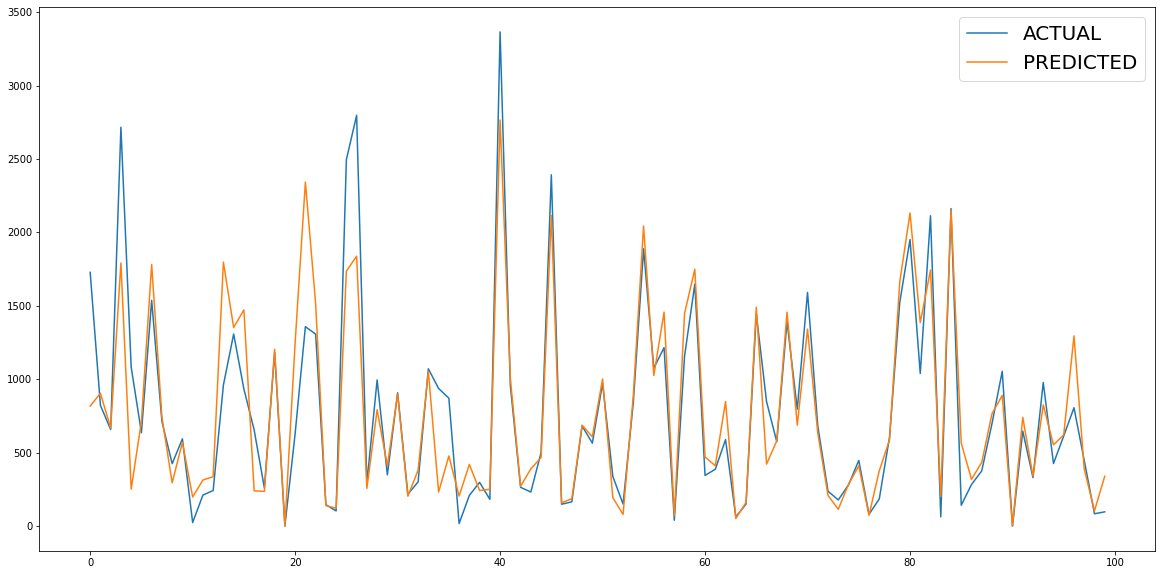

In [ ]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
run_model(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)

#Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor


================Evalution Matrix=========================

MSE : 91354.1406392694
RMSE : 302.24847499907986
R2 : 0.7767499483353062
Adjusted R2 :  0.7751061375545261

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


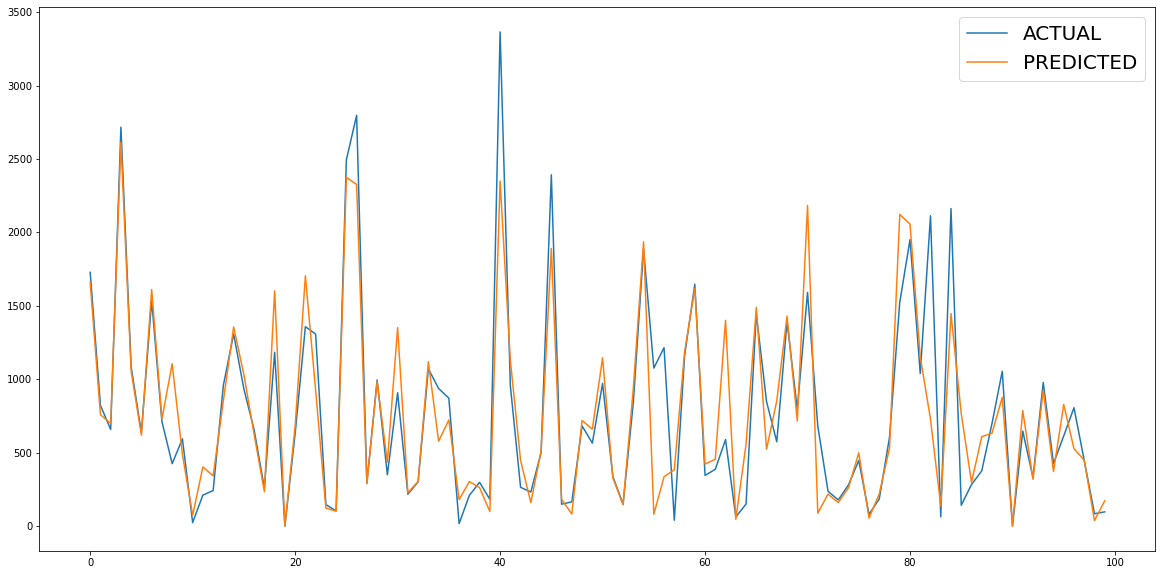

In [ ]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

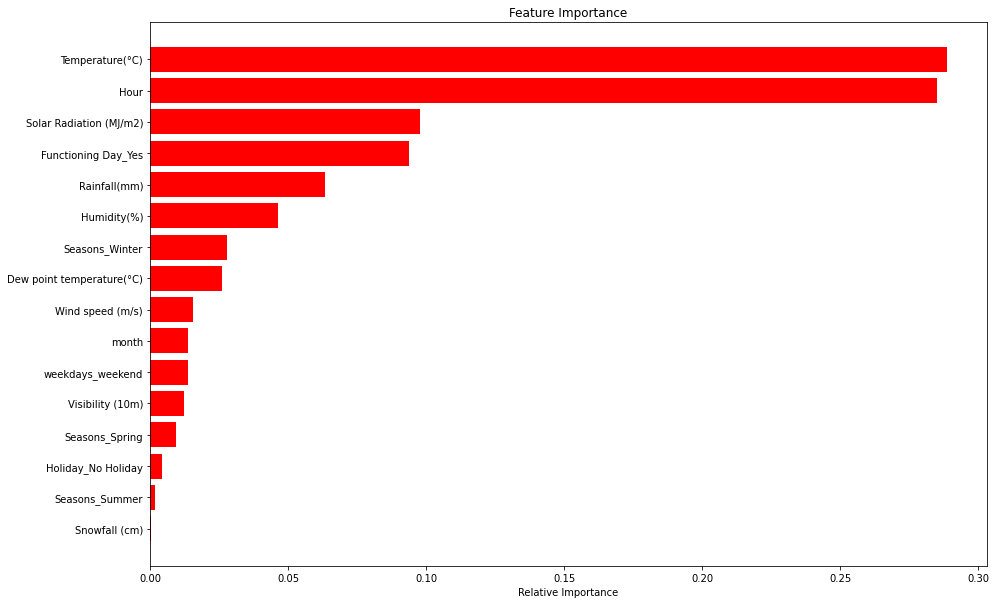

In [ ]:
#getting features importance of decision tree
get_features_importance(dt_model,X_train)

#Random Forest

In [ ]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#creating model of random forest
rf_model = RandomForestRegressor()

In [ ]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [ ]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 62871.24698688407
RMSE : 250.74139464173854
R2 : 0.846356070564227
Adjusted R2 :  0.8452247760999048

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


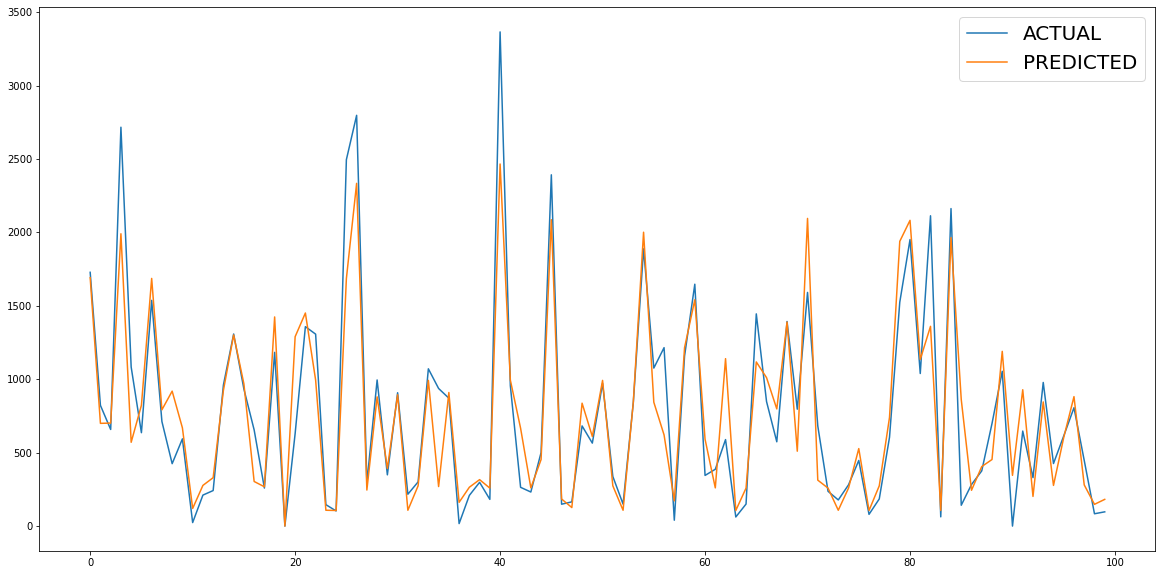

In [ ]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [ ]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

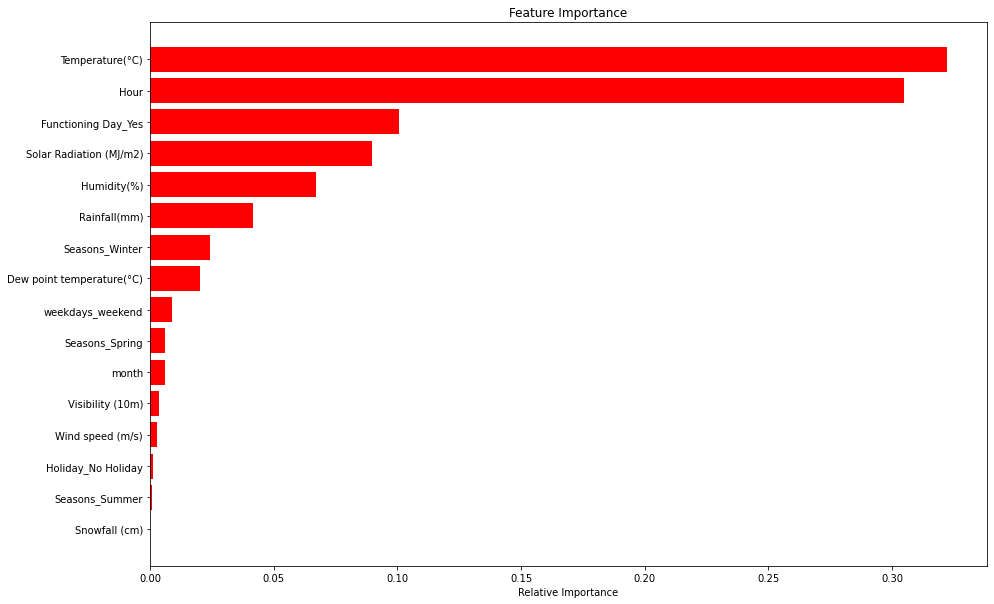

In [ ]:
#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)

#Gradient Boosting

In [ ]:
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [ ]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 54725.09438882481
RMSE : 233.933953048344
R2 : 0.8662635315250437
Adjusted R2 :  0.865278817537193

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


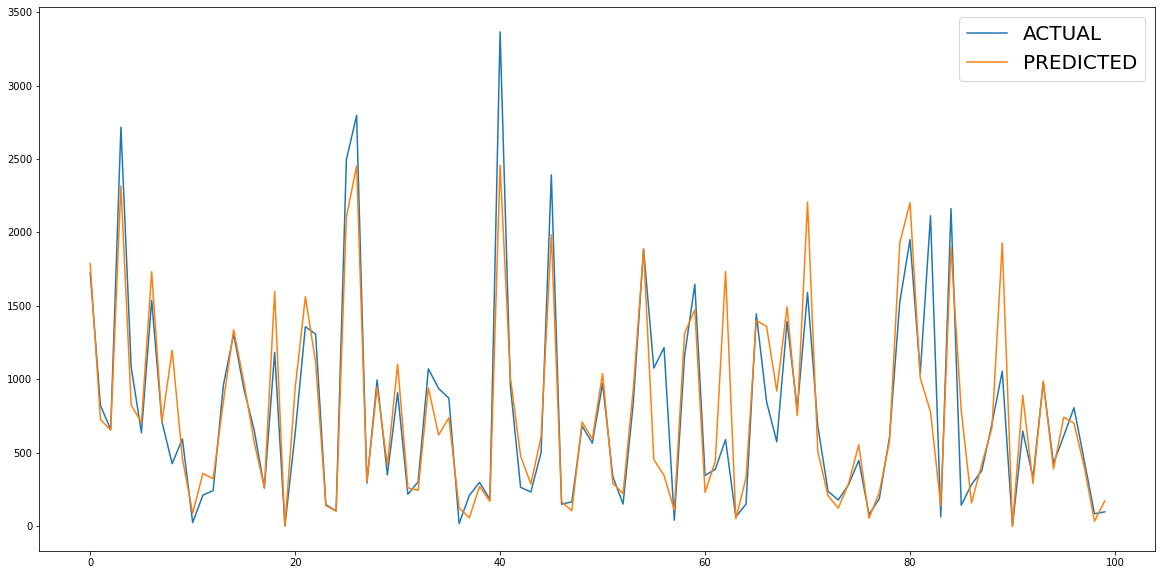

In [ ]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [ ]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

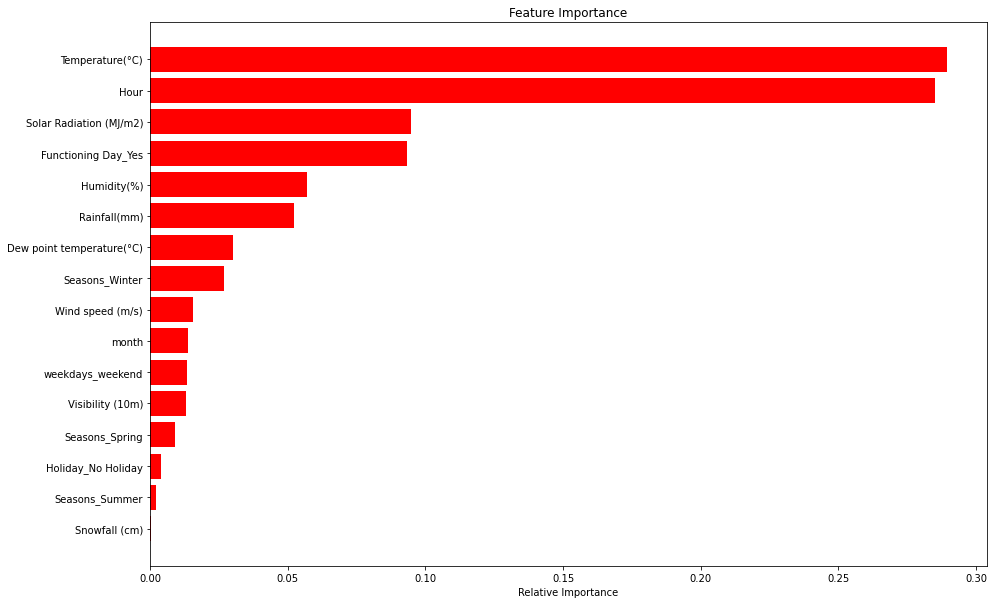

In [ ]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)

#eXtreme Gradient Boosting

In [ ]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [ ]:
#creating Xgboost model
xgb_model=XGBRegressor()

In [ ]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)

[08:35:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:35:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:35:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:35:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:36:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:36:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:36:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:36:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


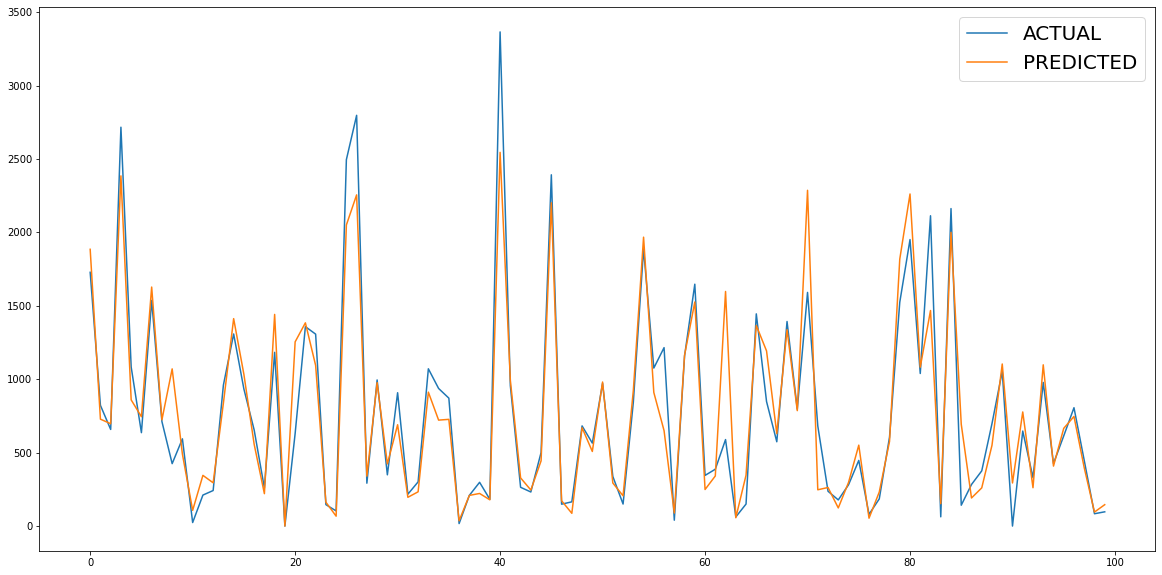

In [ ]:
#calling run_model to train,fit and evalution of xgb_grid model
run_model(xgb_grid,X_train,y_train,X_test,y_test);

In [ ]:
#getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

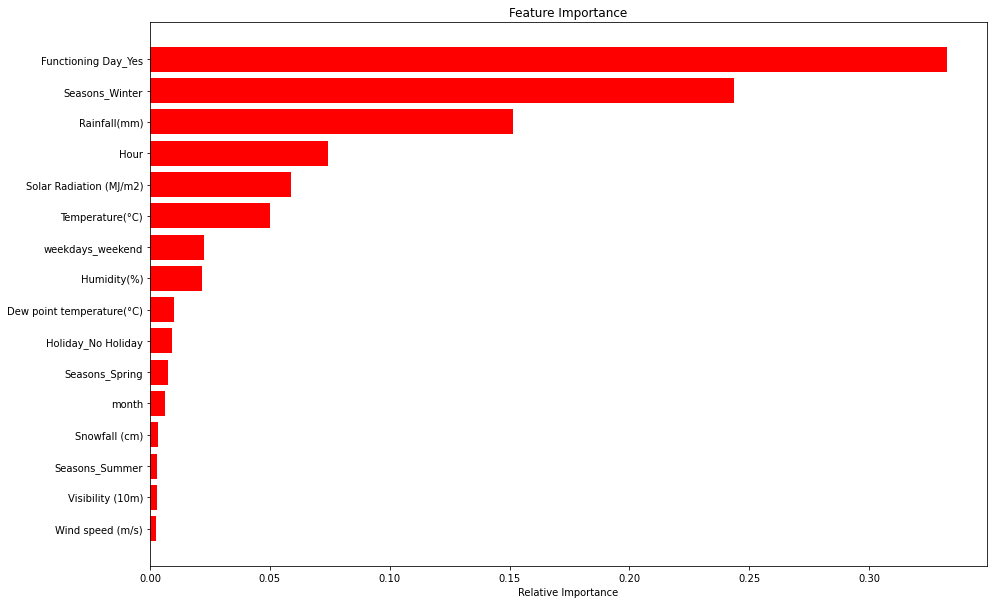

In [ ]:
#getting best param of rf model given by xgb_grid model
get_features_importance(optimal_xgb_model,X_train)

#CatBoost

In [ ]:
#installing catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.4 MB/s 


In [ ]:
#importing cat boost Regressor
from catboost import CatBoostRegressor

In [ ]:
cb_model=CatBoostRegressor()

Learning rate set to 0.055126
0:	learn: 622.7303740	total: 49.3ms	remaining: 49.3s
1:	learn: 601.8830202	total: 52.8ms	remaining: 26.4s
2:	learn: 580.4938464	total: 55.9ms	remaining: 18.6s
3:	learn: 560.9134145	total: 58.6ms	remaining: 14.6s
4:	learn: 542.5060715	total: 61.4ms	remaining: 12.2s
5:	learn: 526.7414247	total: 64.4ms	remaining: 10.7s
6:	learn: 511.1954082	total: 67.3ms	remaining: 9.54s
7:	learn: 496.4447154	total: 70.1ms	remaining: 8.69s
8:	learn: 481.9255943	total: 73ms	remaining: 8.04s
9:	learn: 469.7834574	total: 75.8ms	remaining: 7.5s
10:	learn: 457.1560805	total: 78.6ms	remaining: 7.07s
11:	learn: 446.0481959	total: 81.5ms	remaining: 6.71s
12:	learn: 434.6491867	total: 84.4ms	remaining: 6.41s
13:	learn: 425.0778422	total: 87.4ms	remaining: 6.16s
14:	learn: 417.5409446	total: 89.9ms	remaining: 5.9s
15:	learn: 408.7884678	total: 92.7ms	remaining: 5.7s
16:	learn: 401.6333711	total: 95.6ms	remaining: 5.53s
17:	learn: 394.4612741	total: 98.5ms	remaining: 5.37s
18:	learn: 38

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


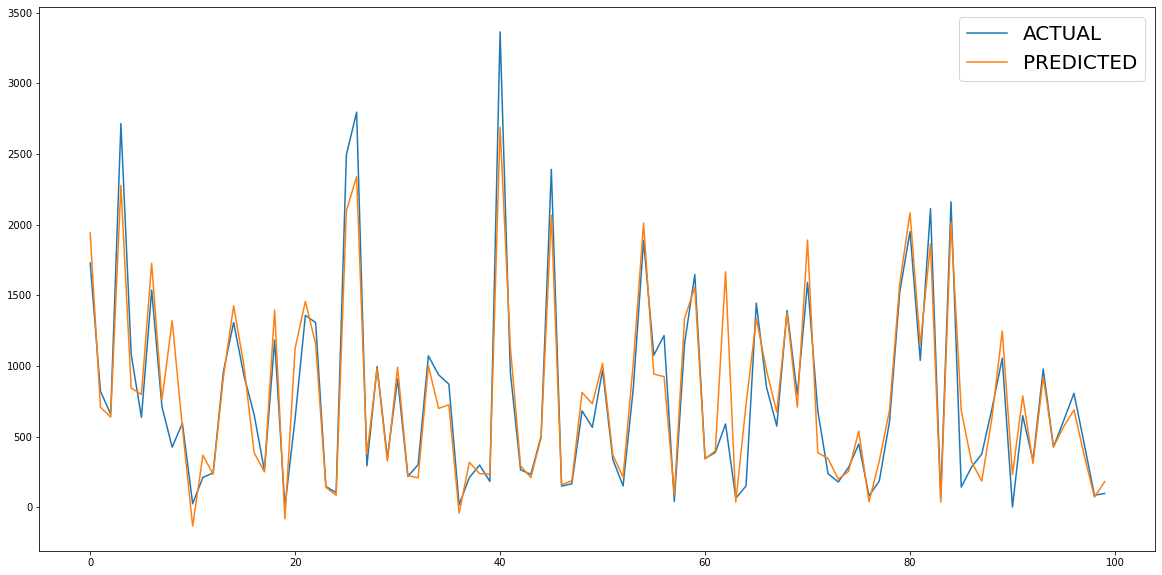

In [ ]:
#calling run_model to train,fit and evalution of catboost model
run_model(cb_model,X_train,y_train,X_test,y_test)

In [ ]:
#checking params of cat boost model
cb_model.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': True,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'classes_count': 0,
 'depth': 6,
 'eval_metric': 'RMSE',
 'feature_border_type': 'GreedyLogSum',
 'force_unit_auto_pair_weights': False,
 'grow_policy': 'SymmetricTree',
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.05512600019574165,
 'loss_function': 'RMSE',
 'max_leaves': 64,
 'min_data_in_leaf': 1,
 'model_shrink_mode': 'Constant',
 'model_shrink_rate': 0,
 'model_size_reg': 0.5,
 'nan_mode': 'Min',
 'penalties_coefficient': 1,
 'pool_metainfo_options': {'tags': {}},
 'posterior_sampling': False,
 'random_seed': 0,
 'random_strength': 1,
 'rsm': 1,
 'sampling_frequency': 'PerTree',
 'score_function': 'Cosine',
 'sparse_features_conflict_fracti

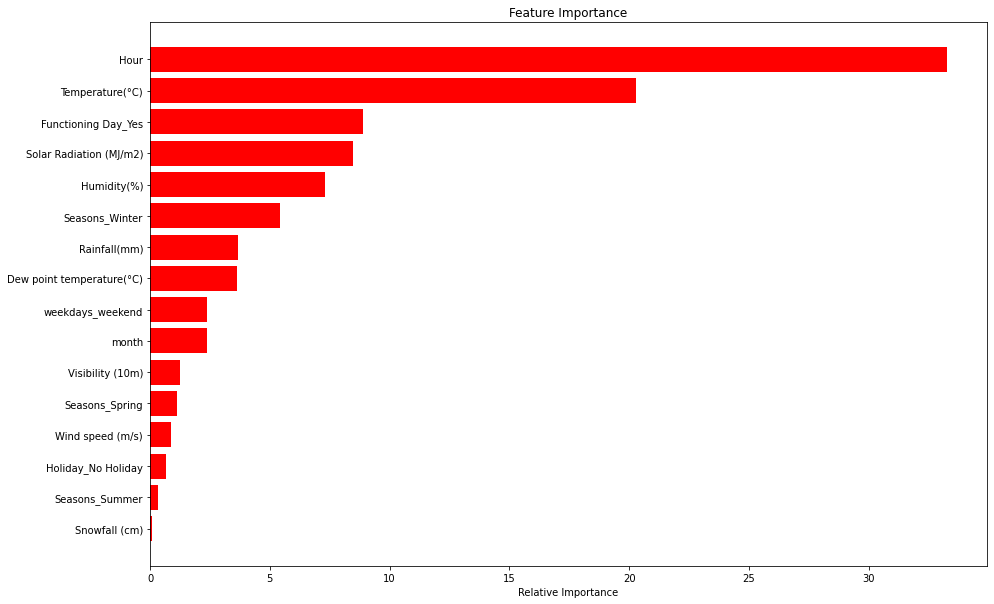

In [ ]:
#getting and visualizing features importance of catboost model
get_features_importance(cb_model,X_train)

#lightGBM

In [ ]:
import lightgbm as lgb

In [ ]:
lgbr=lgb.LGBMRegressor()

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

================Evalution Matrix=========================

MSE : 35410.75375394222
RMSE : 188.17745283094416
R2 : 0.9134636640470446
Adjusted R2 :  0.9128264890009115

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


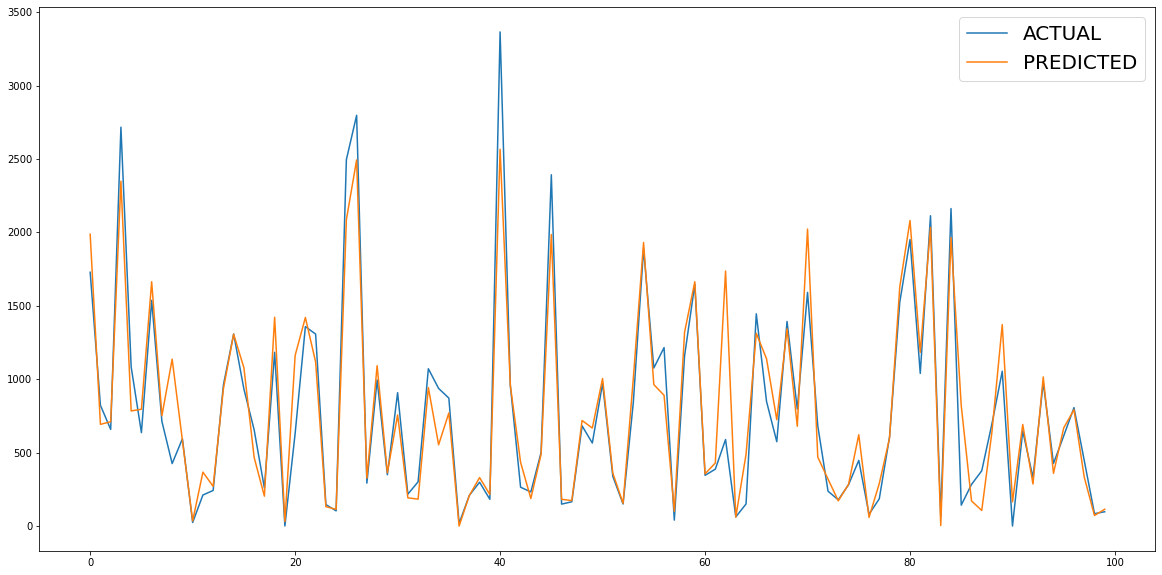

In [ ]:
#calling run_model to train,fit and evalution of catboost model
run_model(lgbr_grid,X_train,y_train,X_test,y_test)

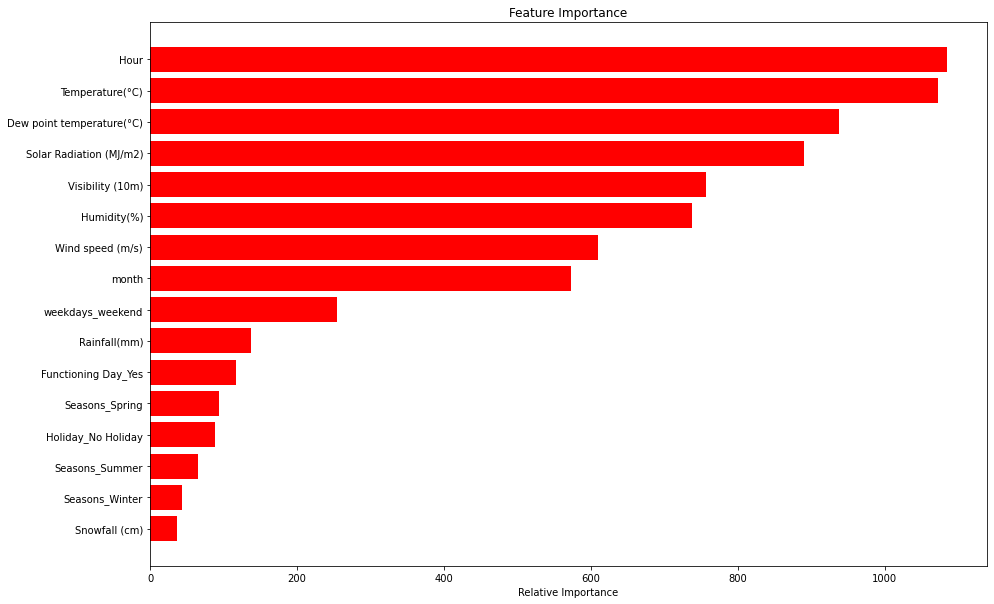

In [ ]:
#getting and visualizing features importance of catboost model
get_features_importance(lgbr_grid.best_estimator_,X_train)

#Combined Evaluation Matrix of All the models

In [ ]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [ ]:
#list of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','K-Nearyest_Neighbor','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB','CATBoost','lightGBM']

In [ ]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [ ]:
matrices_df

Linear          Lasso          Ridge  \
Mean_square_error       175590.552873  175560.907118  175248.935066   
Root_Mean_square_error     419.035264     418.999889     418.627442   
R2                           0.572911       0.572983       0.573742   
Adjusted_R2                  0.569766       0.569839       0.570603   

                           Elasticnet     Polynomial  K-Nearyest_Neighbor  \
Mean_square_error       175346.867499  123952.860328         83411.759209   
Root_Mean_square_error     418.744394     352.069397           288.810940   
R2                           0.573504       0.698509             0.796159   
Adjusted_R2                  0.570363       0.696289             0.794659   

                        Decision_Tree  Random_Forest  Gradient_Boosting  \
Mean_square_error        91354.140639   62871.246987       54725.094389   
Root_Mean_square_error     302.248475     250.741395         233.933953   
R2                           0.776750       0.846356           0.866264   
Adjusted_R2                  0.775106       0.845225           0.865279   

                           Xtreme_GB      CATBoost      lightGBM  
Mean_square_error       40812.801816  36706.535373  35410.753754  
Root_Mean_square_error    202.021785    191.589497    188.177453  
R2                          0.900262      0.910297      0.913464  
Adjusted_R2                 0.899528      0.909637      0.912826

In [ ]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
final_matrices

Models  Mean_square_error  Root_Mean_square_error        R2  \
0                Linear      175590.552873              419.035264  0.572911   
1                 Lasso      175560.907118              418.999889  0.572983   
2                 Ridge      175248.935066              418.627442  0.573742   
3            Elasticnet      175346.867499              418.744394  0.573504   
4            Polynomial      123952.860328              352.069397  0.698509   
5   K-Nearyest_Neighbor       83411.759209              288.810940  0.796159   
6         Decision_Tree       91354.140639              302.248475  0.776750   
7         Random_Forest       62871.246987              250.741395  0.846356   
8     Gradient_Boosting       54725.094389              233.933953  0.866264   
9             Xtreme_GB       40812.801816              202.021785  0.900262   
10             CATBoost       36706.535373              191.589497  0.910297   
11             lightGBM       35410.753754              188.177453  0.913464   

    Adjusted_R2  
0      0.569766  
1      0.569839  
2      0.570603  
3      0.570363  
4      0.696289  
5      0.794659  
6      0.775106  
7      0.845225  
8      0.865279  
9      0.899528  
10     0.909637  
11     0.912826

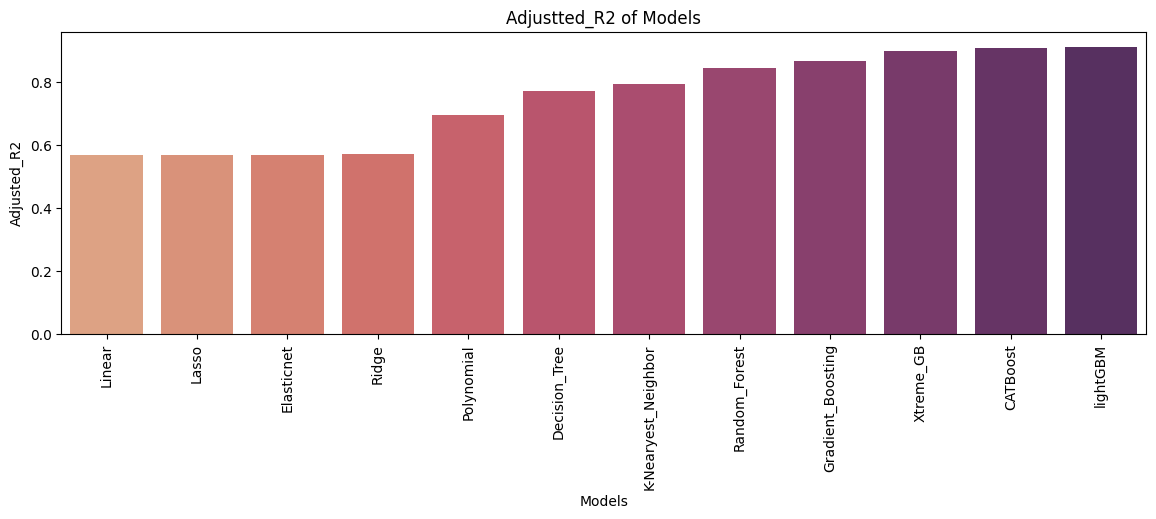

In [ ]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

#Model Explainibility

#SHAP

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 6.4 MB/s 


In [ ]:
from sklearn.tree import export_graphviz
import shap 
sns.set_style('darkgrid')

In [ ]:
for_instance=2

In [ ]:
# shape for xgboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(xgb_grid.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

In [ ]:
#shape for catboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(cb_model)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

In [ ]:
#shap for lightGBM model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(lgbr_grid.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

#ELI5

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 7.2 MB/s 
     |████████████████████████████████| 133 kB 42.6 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=baee900ccbeb72fd7a51f4009fff3d4e090cf393f5a85e33cd908d65329764b0
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [ ]:
import eli5 as eli


In [ ]:
feature_names=list(X_test.columns)

In [ ]:
feature_names=list(X_test.columns)

In [ ]:
#eli5 for xgboost model 
eli.show_prediction(xgb_grid.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

In [ ]:
#eli5 for lgbr model 
eli.show_prediction(lgbr_grid.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

#The green color shows how much the feature contributes to the prediction of the respective class and the weights are positive for the green color.

#The red color has negative weights that indicate the feature isn't contributing to the prediction of that class.

#It can be observed from the above output, eli5 shows us the contribution of each feature in predicting the output.

Final Conclusion:
1.In holiday or non-working days there is demands in rented bikes.

2.There is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.

3.People prefered more rented bikes in the morning than the evening.

4.When the rainfall was less, people have booked more bikes except some few cases.

7.The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.

8.After performing the various models the lightGBM and Catboost found to be the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) shows a higher value for the lightGBM and Catboost models !

9.We can use either lightGBM or catboost model for the bike rental stations.

In [ ]:
#This is all about part of supervised machine learning algorithm